In [1]:
from fastai.vision import load_learner,ImageList,DatasetType,open_image,Path
import pandas as pd
import warnings
import numpy as np
from flask import Flask, request, render_template
from werkzeug.utils import secure_filename
warnings.filterwarnings('ignore')

df= pd.read_csv('/media/praveenkanna/Local disk/Workspace/Fashion_Classification-Myntra_Dataset/Training_labels/labels.csv',header=None)


In [8]:
model= '/media/praveenkanna/Local disk/Workspace/Fashion_Classification-Myntra_Dataset/model'
learn = load_learner(model)


In [9]:
def get_label(predicted_class):
    return df[0].iloc[predicted_class]
    

In [23]:
def print_top_5_pred(preds):
    idx=np.unravel_index(preds.numpy().argsort(axis=None), dims=preds.numpy().shape)
    top_5_pred=idx[1][-5:]
    return_msg=""
    for i,val in enumerate(top_5_pred[::-1]):
        return_msg +=str(str(i+1)+"-->"+str(get_label(val))+"-->Probability:{:.2f}%\n".format(np.round(preds[0][val].numpy()*100),2)+"\n")
        
    return return_msg

In [2]:
def delete_uploadfiles(upload_path):
    for file in Path(upload_path).glob('*'):
        try:
            print("deleted",file)
            file.unlink()
            
        except OSError as e:
            print("Error: %s : %s" % (f, e.strerror))
    return True

In [24]:
#UI paths
app = Flask(__name__)
#run_with_ngrok(app)

upload_path = "static/upload"
app.config["IMAGE_UPLOADS"] = upload_path

#emptying upload file
delete_uploadfiles(upload_path)



@app.route("/")
def index():
    return render_template('index.html')

@app.route('/uploader', methods = ['GET', 'POST'])
def upload_file():
    
    if request.method == 'POST':


        image = request.files['file']
        filename = secure_filename(image.filename)
        image.save(Path(app.config["IMAGE_UPLOADS"]+"/"+ filename))

        print("Image saved")
        my_dict = {}
        for index,file in enumerate(Path(upload_path).glob('*')):
            
            model_input=open_image(file)
            model_pred=learn.predict(model_input)
            custom_msg= str("Predicted Catagory: "+str(get_label(int(model_pred[1]))))
            Prediction_percent = str("Probability:{:.2f}%".format(np.round((model_pred[2][int(model_pred[1])]).numpy()*100,2)))

            reshaped_tensor=model_pred[2].unsqueeze(0)
            top_5_pred = print_top_5_pred(reshaped_tensor)
            '''
            pred_class=str(get_label(int(model_pred[1])))
            print("Probability:{:.2f}%".format(np.round((model_pred[2][int(result[1])]).numpy()*100,2)))

            print("\nTop 5 prediction")
            a=result[2].unsqueeze(0)
            print_top_5_pred(a)
            
            
            
            custom_msg="hi"
            '''
            temp_val=[]
            temp_val.append(file)
            temp_val.append(custom_msg)
            temp_val.append(Prediction_percent)
            temp_val.append(top_5_pred)

            my_dict[index]=temp_val
            
        print("dict--> ",my_dict)
        return render_template('result.html', mydict=my_dict)

        

if __name__ == "__main__":
  app.run(debug=False)



deleted static/upload/backpack.png
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


Image saved


127.0.0.1 - - [01/Jun/2020 00:12:53] "POST /uploader HTTP/1.1" 200 -


dict-->  {0: [PosixPath('static/upload/backpack.png'), 'Predicted Catagory: Backpacks-Unisex-Bags-Accessories', 'Probability:85.37%', '1-->Backpacks-Unisex-Bags-Accessories-->Probability:85.00%\n\n2-->Caps-Men-Headwear-Accessories-->Probability:5.00%\n\n3-->Caps-Unisex-Headwear-Accessories-->Probability:4.00%\n\n4-->Tshirts-Men-Topwear-Apparel-->Probability:2.00%\n\n5-->Sweatshirts-Men-Topwear-Apparel-->Probability:2.00%\n\n']}
Image saved


127.0.0.1 - - [01/Jun/2020 00:16:38] "POST /uploader HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2020 00:16:38] "GET /static/upload/dress4.jpg HTTP/1.1" 200 -


dict-->  {0: [PosixPath('static/upload/backpack.png'), 'Predicted Catagory: Backpacks-Unisex-Bags-Accessories', 'Probability:85.37%', '1-->Backpacks-Unisex-Bags-Accessories-->Probability:85.00%\n\n2-->Caps-Men-Headwear-Accessories-->Probability:5.00%\n\n3-->Caps-Unisex-Headwear-Accessories-->Probability:4.00%\n\n4-->Tshirts-Men-Topwear-Apparel-->Probability:2.00%\n\n5-->Sweatshirts-Men-Topwear-Apparel-->Probability:2.00%\n\n'], 1: [PosixPath('static/upload/dress4.jpg'), 'Predicted Catagory: Sarees-Women-Saree-Apparel', 'Probability:59.27%', '1-->Sarees-Women-Saree-Apparel-->Probability:59.00%\n\n2-->Bra-Women-Innerwear-Apparel-->Probability:33.00%\n\n3-->Briefs-Women-Innerwear-Apparel-->Probability:1.00%\n\n4-->Trunk-Men-Innerwear-Apparel-->Probability:1.00%\n\n5-->Briefs-Men-Innerwear-Apparel-->Probability:1.00%\n\n']}
Image saved


127.0.0.1 - - [01/Jun/2020 00:17:04] "POST /uploader HTTP/1.1" 200 -
127.0.0.1 - - [01/Jun/2020 00:17:04] "GET /static/upload/dress10.jpeg HTTP/1.1" 200 -


dict-->  {0: [PosixPath('static/upload/backpack.png'), 'Predicted Catagory: Backpacks-Unisex-Bags-Accessories', 'Probability:85.37%', '1-->Backpacks-Unisex-Bags-Accessories-->Probability:85.00%\n\n2-->Caps-Men-Headwear-Accessories-->Probability:5.00%\n\n3-->Caps-Unisex-Headwear-Accessories-->Probability:4.00%\n\n4-->Tshirts-Men-Topwear-Apparel-->Probability:2.00%\n\n5-->Sweatshirts-Men-Topwear-Apparel-->Probability:2.00%\n\n'], 1: [PosixPath('static/upload/dress10.jpeg'), 'Predicted Catagory: Kurtas-Women-Topwear-Apparel', 'Probability:86.96%', '1-->Kurtas-Women-Topwear-Apparel-->Probability:87.00%\n\n2-->Kurtis-Women-Topwear-Apparel-->Probability:4.00%\n\n3-->Kurtas-Men-Topwear-Apparel-->Probability:2.00%\n\n4-->Shirts-Women-Topwear-Apparel-->Probability:2.00%\n\n5-->Stoles-Women-Stoles-Accessories-->Probability:1.00%\n\n'], 2: [PosixPath('static/upload/dress4.jpg'), 'Predicted Catagory: Sarees-Women-Saree-Apparel', 'Probability:59.27%', '1-->Sarees-Women-Saree-Apparel-->Probability:5

[2020-06-01 00:18:12,880] ERROR in app: Exception on /uploader [POST]
Traceback (most recent call last):
  File "/home/praveenkanna/anaconda3/envs/Python3/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/praveenkanna/anaconda3/envs/Python3/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/praveenkanna/anaconda3/envs/Python3/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/praveenkanna/anaconda3/envs/Python3/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/praveenkanna/anaconda3/envs/Python3/lib/python3.8/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/praveenkanna/anaconda3/envs/Python3/lib/python3.8/site-packages/flask/app.py", line 1936, in

In [ ]:
#img=open_image('/media/praveenkanna/Local disk/Workspace/Fashion_Classification-Myntra_Dataset/inputs/results51_0.png')
#img=open_image('/media/praveenkanna/Local disk/Workspace/Fashion_Classification-Myntra_Dataset/inputs/dress2.jpeg') 
#img=open_image('/media/praveenkanna/Local disk/Workspace/Fashion_Classification-Myntra_Dataset/inputs/tshirt.jpeg') 
img=open_image('/media/praveenkanna/Local disk/Workspace/Fashion_Classification-Myntra_Dataset/inputs/dress10.jpeg') 
#img=open_image('/media/praveenkanna/Local disk/Workspace/Fashion_Classification-Myntra_Dataset/inputs/dress6.jpg') 

result=learn.predict(img)

print("Predicted Class:", get_label(int(result[1])))
print("Probability:{:.2f}%".format(np.round((result[2][int(result[1])]).numpy()*100,2)))

print("\nTop 5 prediction")
a=result[2].unsqueeze(0)
print_top_5_pred(a)

In [ ]:
img

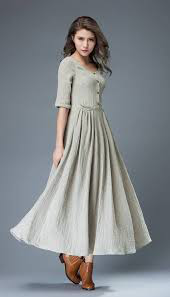

In [12]:
s=Path('static/dress9.jpeg')
open_image(s)

In [ ]:
print(img)

In [16]:
str("Probability:{:.2f}%".format(3.444433))

'Probability:3.44%'

In [ ]:
result[2]

In [ ]:
ImageList.from_folder('/media/praveenkanna/Local disk/Workspace/Fashion_Classification-Myntra_Dataset/inputs')

In [ ]:
load_learner??

In [ ]:
ItemList

In [ ]:
learn1 = load_learner(model, 
                      test=ImageList.from_folder('/media/praveenkanna/Local disk/Workspace/Fashion_Classification-Myntra_Dataset/temp'))

In [ ]:
preds,y = learn1.get_preds(ds_type=DatasetType.Test)
preds

In [ ]:
a=preds.numpy()

In [ ]:
np.unravel_index(a.argsort(axis=None), dims=a.shape)

In [ ]:
ix = np.unravel_index(a.argsort(axis=None), dims=a.shape)
ix

In [ ]:
top_5_pred=ix[1][-5:]

In [ ]:
preds[0][55]

In [ ]:
def print_top_5_pred(preds):
    idx=np.unravel_index(preds.numpy().argsort(axis=None), dims=preds.numpy().shape)
    top_5_pred=idx[1][-5:]
    for i,val in enumerate(top_5_pred[::-1]):
        print("\n",i+1,":",get_label(val),"\nProbability:",preds[0][val])
print_top_5_pred(preds)   

In [ ]:
img

In [ ]:
a=result[2].unsqueeze(0)
print_top_5_pred(a) 

In [ ]:
learn1